In [125]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import torch
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from astropy.io import fits
from copy import deepcopy
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'
from scipy.ndimage import gaussian_filter
from os.path import join as oj
import sys

import acd
from tqdm import tqdm
import pickle as pkl
import torchvision
import models
import time
sys.path.append('../../visualization')
sys.path.append('..')
import visualize as viz
from transforms_np import bandpass_filter
import bandpass_filter
import util
# plt.style.use('dark_background')
from numpy.fft import *
from data import *
from style import *
data_path = '/scratch/users/vision/data/cosmo'
torch.manual_seed(42)
np.random.seed(42)
mnu_dataset = MassMapsDataset(oj(data_path, 'cosmological_parameters.txt'),  oj(data_path, 'z1_256'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# look at images

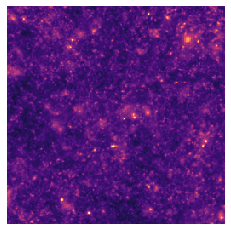

In [126]:
def cshow(im):
    plt.imshow(im, cmap='magma', vmax=0.15, vmin=-0.05)
    plt.axis('off')
    
    
im = mnu_dataset[0]['image'].astype(np.float32)
#     plt.title(r"$m_\nu$=%0.2f; $\Omega_m$=%0.2f; $10^9A_s$=%0.2f"%(sample['params'][0], sample['params'][1], sample['params'][2] ) )
cshow(im)

*what are the units?*

In [163]:
sample_spacing = 0.8 # arcmins
freq_arr = fftshift(fftfreq(n=im.shape[0], d=sample_spacing)) # 1 / arcmin
print(freq_arr[0], freq_arr[-1])

-0.625 0.6201171875


In [ ]:
plt.figure(figsize=(8, 8))
R, C = 2, 2
for i in range(R * C):
    sample = mnu_dataset[i]
    plt.subplot(R, C, i + 1)
    plt.axis('off')
    plt.imshow(np.squeeze(sample['image']), cmap='magma',vmax=0.15,vmin=-0.05 )

plt.tight_layout()
plt.show()

In [ ]:
viz.visualize(im, bandpass_filter)

# analyze one prediction

In [ ]:
R, C = 2, 5
plt.figure(dpi=300, figsize=(10, 5))
for i in range(10):
    band_center = i * 0.625 / 10
    plt.subplot(R, C, i + 1)
    if i == 0:
        plt.imshow(im, cmap='magma', vmax=0.15, vmin=-0.05)
        plt.title('original image')
    else:
        plt.title(f'{band_center:0.2f}')
        plt.imshow(bandpass_filter(im, band_center=band_center), cmap='magma', vmax=0.15, vmin=-0.05)
    plt.axis('off')
plt.tight_layout()